# Fordgobike data analysis
## by Muxin

## Investigation Overview

> *Fordgobike* is a project of bike sharing system. I have two datasets of 2018 and 2019 records of bike riding. I would focus on following aspects: is this project making progresses; what are the users see in this project; what else can we do to improve the project according to our ovservations.

## Dataset Overview

> These datasets are provided as monthly records, with these columns 'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'bike_share_for_all_trip'. 

> For analyzing convenience, I concacted monthly datasets to two yearly datasets, created two columns *month* and *hour*.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike =  pd.read_csv(r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2017-fordgobike-tripdata.csv\2017-fordgobike-tripdata.csv')
fordgobike['date'] = [i[0] for i in fordgobike['start_time'].str.split(' ')]
fordgobike['hour'] = [i[1].split(':')[0] for i in fordgobike['start_time'].str.split(' ')]

fordgobike_18 = pd.read_csv(r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2018\201801-fordgobike-tripdata.csv')
months_18 = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for month in months_18:
    month_path = r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2018\2018'+ month + '-fordgobike-tripdata.csv'
    f = pd.read_csv(month_path)
    fordgobike_18 = pd.concat([fordgobike_18,f])
    
fordgobike_19 = pd.read_csv(r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2019\201901-fordgobike-tripdata.csv')
ford_19 = ['02', '03', '04']

for month in ford_19:
    month_path = r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2019\2019'+ month + '-fordgobike-tripdata.csv'
    f = pd.read_csv(month_path)
    fordgobike_19 = pd.concat([fordgobike_19,f])

bay_19 = ['201905-baywheels-tripdata.csv','201906-baywheels-tripdata.csv','201907-baywheels-tripdata.csv'
          ,'201908-baywheels-tripdata.csv','201909-baywheels-tripdata.csv','201910-baywheels-tripdata.csv'
          ,'201911-baywheels-tripdata.csv','201912-baywheels-tripdata.csv']
for rest in bay_19:
    b_path = r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2019\\' + rest
    f = pd.read_csv(b_path)
    fordgobike_19 = pd.concat([fordgobike_19,f])



fordgobike_18['date'] = [i[0] for i in fordgobike_18['start_time'].str.split(' ')]
fordgobike_18['hour'] = [i[1].split(':')[0] for i in fordgobike_18['start_time'].str.split(' ')]

fordgobike_19['date'] = [i[0] for i in fordgobike_19['start_time'].str.split(' ')]
fordgobike_19['hour'] = [i[1].split(':')[0] for i in fordgobike_19['start_time'].str.split(' ')]

fordgobike_18['month'] = [mo[1] for mo in fordgobike_18['date'].str.split('-')]
fordgobike_19['month'] = [mo[1] for mo in fordgobike_19['date'].str.split('-')]

## User Growth

> The most concerning problem about a project is if this project is on the right track, user growth in this case. So I take a look at the total number of records for 2018 and 2019. It is obvious to find there was a growth, and according to calculation this number is about 35%.

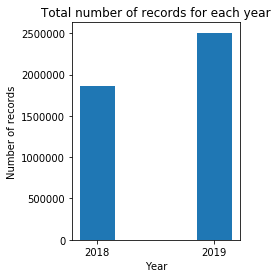

In [3]:
user_growth = (fordgobike_18.shape[0], fordgobike_19.shape[0])
figure = plt.figure(figsize=(3,4))
plt.bar(['2018', '2019'],
       user_growth
       ,width=0.3);
plt.ylabel('Number of records');
plt.xlabel('Year');
plt.title('Total number of records for each year');

## User Type Difference

> As the user increase is verified by the above plot, I plot a user type distribution for each year to see if what kind of user dominate the growth. Apparently the dominate user is subscribers, this is an understandable result considering subscribers always has tighter bond than random customers.

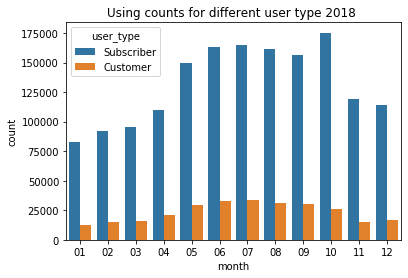

In [4]:
sb.countplot(data=fordgobike_18
            , x='month'
            , hue='user_type');
plt.title('Using counts for different user type 2018 ');

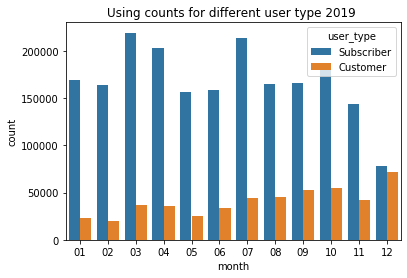

In [5]:
sb.countplot(data=fordgobike_19
            , x='month'
            , hue='user_type');
plt.title('Using counts for different user type 2019 ');

## Ratio of Subscriber
>Given that subscribers use bikes more thanc customers, the final aim is turning customers into subscribers. So the expected trend for percentage of subscribers is decreasing  with user volume increase. So I plot the change of subscriber ratio below verifies the wanted trend. Despite an unusual dip by the end, the overall trend is quite good.

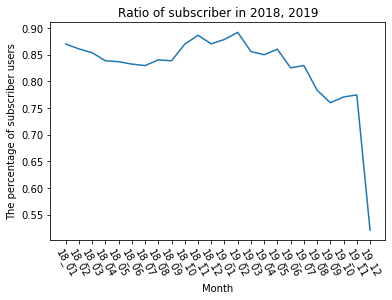

In [6]:
sub_count_18 = fordgobike_18[fordgobike_18['user_type']=='Subscriber'].groupby(by='month').size()
all_count_18 = fordgobike_18.groupby(by='month').size()
sub_count_19 = fordgobike_19[fordgobike_19['user_type']=='Subscriber'].groupby(by='month').size()
all_count_19 = fordgobike_19.groupby(by='month').size()

sub_count_18.index = ['18_'+idx for idx in sub_count_18.index]
sub_count_19.index = ['19_'+idx for idx in sub_count_19.index]

all_count_18.index = sub_count_18.index
all_count_19.index = sub_count_19.index

sub_count = pd.concat([sub_count_18, sub_count_19], axis=0)
all_count = pd.concat([all_count_18, all_count_19], axis=0)


plt.plot(sub_count/all_count);
plt.xticks(rotation=300);
plt.xlabel('Month');
plt.ylabel('The percentage of subscriber users');
plt.title('Ratio of subscriber in 2018, 2019');

## User Average Time
>The above observations are based on travel counts, which means ignored the travel duration and cases of same person repeatedly using bikes. To better evaluate the situation, I took average of travel duration monthly for different user types for visualization. This graph shows the subscribers are tend to use bikes much shorter time than the customers. The average travel time for them can be as long as half an hour. This finding triggers my interest of finding out how many users tend to use bikes longer than commute, if the market is large, we could considering another stratagy targeting these customers.

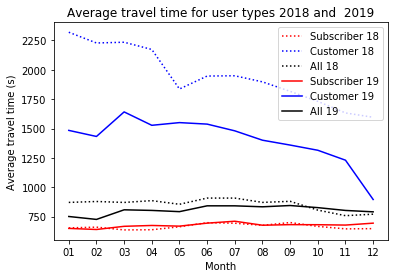

In [7]:
plt.plot(fordgobike_18[fordgobike_18['user_type']=='Subscriber'].groupby('month').mean()['duration_sec'], color='red'
         ,linestyle='dotted', label='Subscriber 18');
plt.plot(fordgobike_18[fordgobike_18['user_type']=='Customer'].groupby('month').mean()['duration_sec'], color='blue'
        ,linestyle='dotted', label='Customer 18');
plt.plot(fordgobike_18.groupby('month').mean()['duration_sec'], color='black'
        ,linestyle='dotted', label='All 18');

plt.plot(fordgobike_19[fordgobike_19['user_type']=='Subscriber'].groupby('month').mean()['duration_sec'], color='red'
        , label='Subscriber 19');
plt.plot(fordgobike_19[fordgobike_19['user_type']=='Customer'].groupby('month').mean()['duration_sec'], color='blue'
        , label='Customer 19');
plt.plot(fordgobike_19.groupby('month').mean()['duration_sec'], color='black'
        , label='All 19');

plt.legend();
plt.xlabel('Month');
plt.ylabel('Average travel time (s)');
plt.title('Average travel time for user types 2018 and  2019');

## Long-time Users
>As can be seen from the below plot, about 1.4% of records with travel duration longer than an hour. This is about 60,000 travels in 6,370,000 travels. But if we change our standard to 0.5 hour, this ratio goes up to 5%, which is about 220,000 in 6,370,000 travels. Combined with the finding in the previous parts, much fewer customers has much higher average duration, it is possible that some customers are using these bikes for traveling purpose or even sport purpose rather than commute. We could keep monitoring this data changing, if the ratio keeps going up, another product for long time riders with more comfortable riding experience and higher charge could be taken into account.

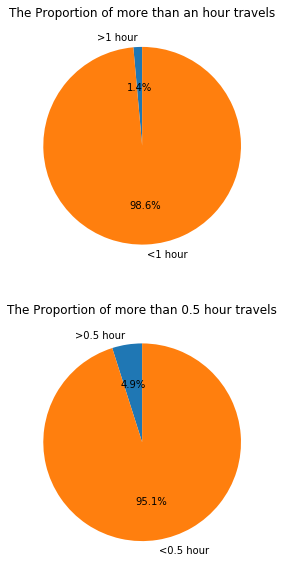

In [8]:
out_18_1 = fordgobike_18[fordgobike_18['duration_sec']>3600].shape[0]
out_19_1 = fordgobike_19[fordgobike_19['duration_sec']>3600].shape[0]

out_18_05 = fordgobike_18[fordgobike_18['duration_sec']>1800].shape[0]
out_19_05 = fordgobike_19[fordgobike_19['duration_sec']>1800].shape[0]

all_18 = fordgobike_18.shape[0]
all_19 = fordgobike_19.shape[0]

out_1 = out_18_1 + out_19_1
short_ = all_18 + all_19 - out_1

out_05 = out_18_05 + out_19_05
short_05 = all_18 + all_19 - out_05 

fig = plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
plt.pie([out_1, short_]
       , labels=['>1 hour', '<1 hour']
       , startangle=90
       , autopct='%1.1f%%'
       );
plt.title('The Proportion of more than an hour travels');

plt.subplot(2,1,2)
plt.pie([out_05, short_05]
       , labels=['>0.5 hour', '<0.5 hour']
       , startangle=90
       , autopct='%1.1f%%'
       );
plt.title('The Proportion of more than 0.5 hour travels');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!